<a href="https://colab.research.google.com/github/MartinaCecchetto/DSIM/blob/main/Assignment4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Assignment**
Define, train, and evaluate the following architecture on the MNIST dataset, and on the CIFAR10 dataset:

* Explicit input layer
* Convolution (2D) with 32 3$\times$3 filters
* ReLU
* Max pooling (2D) with one 2$\times$2 filter
* Flattening
* Fully-connected mapping to 128 dimensions
* ReLU
* Fully-connected mapping to the final problem size

In [34]:
from tensorflow import keras
import numpy as np
from matplotlib import pyplot as plt
from tensorflow.keras import layers
from sklearn.metrics import classification_report, confusion_matrix

In [35]:
(x_train_mnist, y_train_mnist), (x_test_mnist, y_test_mnist) = keras.datasets.mnist.load_data()
(x_train_cifar10, y_train_cifar10), (x_test_cifar10, y_test_cifar10) = keras.datasets.cifar10.load_data()

In [36]:
print(x_train_mnist.shape)
print(x_train_cifar10.shape)

(60000, 28, 28)
(50000, 32, 32, 3)


* **MNIST** 60000 istanze ciascuna rappresentata con una immagine 28x28 pixel e un unico canale
* **CIFAR10** 50000 istanze ciascuna rappresentata con una immagine 32x32 pixel e avente 3 canali (RGB)

Text(0.5, 1.0, 'CIFAR10')

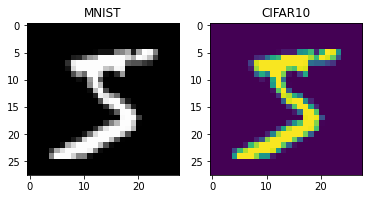

In [37]:
plt.subplot(1,2,1);plt.imshow(x_train_mnist[0], cmap='gray');plt.title("MNIST")
plt.subplot(1,2,2);plt.imshow(x_train_mnist[0]);plt.title("CIFAR10")

Aggiungo un'ulteriore dimensione (equivalente a quella del canale) a `x_train_mnist` e `x_test_mnist`

In [38]:
x_train_mnist = np.expand_dims(x_train_mnist, axis=-1)
x_test_mnist = np.expand_dims(x_test_mnist, axis=-1)
print(x_train_mnist.shape)
print(x_test_mnist.shape)

(60000, 28, 28, 1)
(10000, 28, 28, 1)


In [39]:
print(x_train_mnist[0,6,12])
print(x_train_cifar10[0,6,12])

[170]
[107  71  34]


I pixel in entrambe le immagini sono rappresentate con un valore intero tra 0 e 255, bisogna convertire i pixel in modo tale che abbiano un valore appartenente ad un range tra 0 e 1.

In [40]:
x_train_mnist = x_train_mnist.astype('float32')/255.0
x_test_mnist = x_test_mnist.astype('float32')/255.0
x_train_cifar10 = x_train_cifar10.astype('float32')/255.0
x_test_cifar10 = x_test_cifar10.astype('float32')/255.0

Aspetto dell'output

In [41]:
print(y_train_mnist.shape)
print(y_train_mnist[0])
print(y_train_cifar10.shape)
print(y_train_cifar10[0])

(60000,)
5
(50000, 1)
[6]


Le classi devono essere passate in forma one-hot-encoding

In [42]:
num_classes = 10
yc_train_mnist = keras.utils.to_categorical(y_train_mnist, num_classes)
yc_test_mnist = keras.utils.to_categorical(y_test_mnist, num_classes)
yc_train_cifar10 = keras.utils.to_categorical(y_train_cifar10, num_classes)
yc_test_cifar10 = keras.utils.to_categorical(y_test_cifar10, num_classes)

In [43]:
print(yc_train_mnist[0])
print(yc_train_cifar10[0])

[0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]
[0. 0. 0. 0. 0. 0. 1. 0. 0. 0.]


# Primo modello: MNIST

In [44]:
model = keras.Sequential()
model.add(keras.Input((28,28,1)))
model.add(layers.Conv2D(32, kernel_size=(3, 3), activation="relu"))
model.add(layers.MaxPooling2D(pool_size=(2, 2)))
model.add(layers.Flatten())
model.add(layers.Dense(128, activation='relu'))
model.add(layers.Dense(num_classes, activation='softmax'))

In [45]:
model.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_3 (Conv2D)            (None, 26, 26, 32)        320       
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 13, 13, 32)        0         
_________________________________________________________________
flatten_3 (Flatten)          (None, 5408)              0         
_________________________________________________________________
dense_6 (Dense)              (None, 128)               692352    
_________________________________________________________________
dense_7 (Dense)              (None, 10)                1290      
Total params: 693,962
Trainable params: 693,962
Non-trainable params: 0
_________________________________________________________________


In [46]:
model.compile(loss=keras.losses.categorical_crossentropy,
              optimizer=keras.optimizers.Adamax(),
              metrics=['accuracy'])

Utilizzo come validation test il 20% del train set

In [47]:
history_mnist=model.fit(x_train_mnist, yc_train_mnist, batch_size=128, epochs=10,verbose=1,validation_split=0.2);

Epoch 1/10
375/375 [==============================] - 2s 5ms/step - loss: 0.6182 - accuracy: 0.8327 - val_loss: 0.1750 - val_accuracy: 0.9547
Epoch 2/10
375/375 [==============================] - 1s 4ms/step - loss: 0.1570 - accuracy: 0.9554 - val_loss: 0.1114 - val_accuracy: 0.9702
Epoch 3/10
375/375 [==============================] - 1s 4ms/step - loss: 0.1062 - accuracy: 0.9703 - val_loss: 0.0943 - val_accuracy: 0.9747
Epoch 4/10
375/375 [==============================] - 1s 4ms/step - loss: 0.0802 - accuracy: 0.9784 - val_loss: 0.0742 - val_accuracy: 0.9786
Epoch 5/10
375/375 [==============================] - 1s 4ms/step - loss: 0.0640 - accuracy: 0.9816 - val_loss: 0.0736 - val_accuracy: 0.9791
Epoch 6/10
375/375 [==============================] - 1s 4ms/step - loss: 0.0545 - accuracy: 0.9847 - val_loss: 0.0661 - val_accuracy: 0.9796
Epoch 7/10
375/375 [==============================] - 1s 4ms/step - loss: 0.0459 - accuracy: 0.9873 - val_loss: 0.0631 - val_accuracy: 0.9823
Epoch 

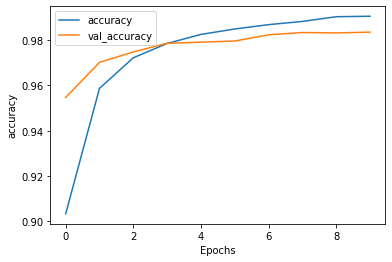

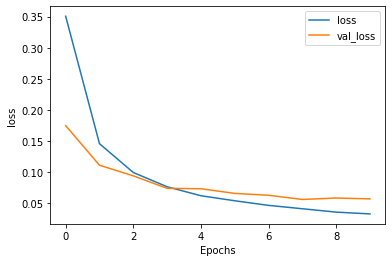

In [48]:
def plot_graphs(history, string):
  plt.plot(history.history[string])
  plt.plot(history.history['val_'+string])
  plt.xlabel("Epochs")
  plt.ylabel(string)
  plt.legend([string, 'val_'+string])
  plt.show()

plot_graphs(history_mnist, "accuracy")  
plot_graphs(history_mnist, "loss")

Valutazione

In [49]:
score = model.evaluate(x_test_mnist, yc_test_mnist, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

Test loss: 0.04697408899664879
Test accuracy: 0.9837999939918518


## Classification report e confusion matrix sul dataset MNIST

Classification report:
              precision    recall  f1-score   support

           0       0.98      0.99      0.99       980
           1       0.98      1.00      0.99      1135
           2       0.99      0.98      0.98      1032
           3       0.99      0.99      0.99      1010
           4       0.99      0.99      0.99       982
           5       0.99      0.98      0.99       892
           6       0.99      0.98      0.99       958
           7       0.99      0.97      0.98      1028
           8       0.97      0.99      0.98       974
           9       0.99      0.97      0.98      1009

    accuracy                           0.98     10000
   macro avg       0.98      0.98      0.98     10000
weighted avg       0.98      0.98      0.98     10000

Confusion matrix:


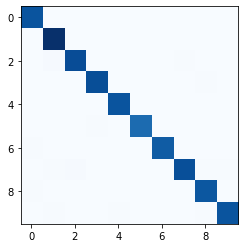

In [50]:
yc_pred_mnist = model.predict(x_test_mnist)
y_pred_mnist = np.argmax(yc_pred_mnist, axis=1)
print('Classification report:')
print(classification_report(y_test_mnist, y_pred_mnist))

print('Confusion matrix:')
cm = confusion_matrix(y_test_mnist, y_pred_mnist)
plt.imshow(cm, cmap=plt.cm.Blues)

In questo caso tutte le categorie vengono classificate con la loro vera classe.

# Secondo modello: CIFAR10

In [51]:
model = keras.Sequential()
model.add(keras.Input((32,32,3)))
model.add(layers.Conv2D(32, kernel_size=(3, 3), activation="relu"))
model.add(layers.MaxPooling2D(pool_size=(2, 2)))
model.add(layers.Flatten())
model.add(layers.Dense(128, activation='relu'))
model.add(layers.Dense(num_classes, activation='softmax'))

In [52]:
model.summary()

Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_4 (Conv2D)            (None, 30, 30, 32)        896       
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 15, 15, 32)        0         
_________________________________________________________________
flatten_4 (Flatten)          (None, 7200)              0         
_________________________________________________________________
dense_8 (Dense)              (None, 128)               921728    
_________________________________________________________________
dense_9 (Dense)              (None, 10)                1290      
Total params: 923,914
Trainable params: 923,914
Non-trainable params: 0
_________________________________________________________________


In [53]:
model.compile(loss=keras.losses.categorical_crossentropy,
              optimizer=keras.optimizers.Adamax(),
              metrics=['accuracy'])

Utilizzo come validation test il 20% del train set

In [54]:
history_cifar10=model.fit(x_train_cifar10, yc_train_cifar10, batch_size=128, epochs=10,verbose=1,validation_split=0.2);

Epoch 1/10
313/313 [==============================] - 2s 6ms/step - loss: 2.0158 - accuracy: 0.2874 - val_loss: 1.5974 - val_accuracy: 0.4491
Epoch 2/10
313/313 [==============================] - 1s 5ms/step - loss: 1.5234 - accuracy: 0.4721 - val_loss: 1.4348 - val_accuracy: 0.5022
Epoch 3/10
313/313 [==============================] - 1s 5ms/step - loss: 1.3814 - accuracy: 0.5166 - val_loss: 1.3504 - val_accuracy: 0.5280
Epoch 4/10
313/313 [==============================] - 1s 5ms/step - loss: 1.2902 - accuracy: 0.5498 - val_loss: 1.2919 - val_accuracy: 0.5522
Epoch 5/10
313/313 [==============================] - 1s 5ms/step - loss: 1.2282 - accuracy: 0.5750 - val_loss: 1.2448 - val_accuracy: 0.5700
Epoch 6/10
313/313 [==============================] - 1s 5ms/step - loss: 1.1720 - accuracy: 0.5901 - val_loss: 1.2074 - val_accuracy: 0.5853
Epoch 7/10
313/313 [==============================] - 1s 5ms/step - loss: 1.1391 - accuracy: 0.6045 - val_loss: 1.1958 - val_accuracy: 0.5830
Epoch 

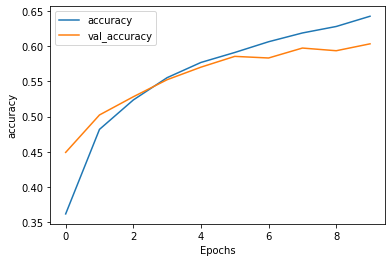

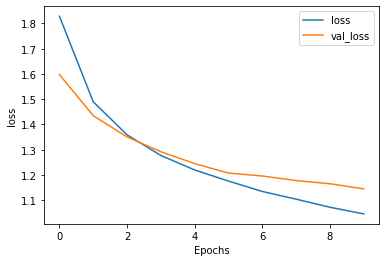

In [55]:
plot_graphs(history_cifar10, "accuracy")  
plot_graphs(history_cifar10, "loss")

Valutazione

In [56]:
score = model.evaluate(x_test_cifar10, yc_test_cifar10, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

Test loss: 1.1339038610458374
Test accuracy: 0.5978999733924866


## Classification report e confusion matrix sul dataset CIFAR10

Classification report:
              precision    recall  f1-score   support

           0       0.65      0.67      0.66      1000
           1       0.72      0.73      0.72      1000
           2       0.43      0.53      0.48      1000
           3       0.37      0.55      0.44      1000
           4       0.63      0.41      0.49      1000
           5       0.53      0.49      0.51      1000
           6       0.80      0.58      0.67      1000
           7       0.68      0.67      0.68      1000
           8       0.75      0.69      0.72      1000
           9       0.65      0.66      0.66      1000

    accuracy                           0.60     10000
   macro avg       0.62      0.60      0.60     10000
weighted avg       0.62      0.60      0.60     10000

Confusion matrix:


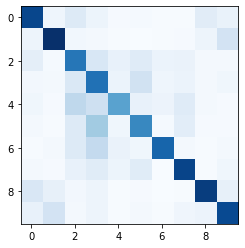

In [57]:
yc_pred_cifar10 = model.predict(x_test_cifar10)
y_pred_cifar10 = np.argmax(yc_pred_cifar10, axis=1)
print('Classification report:')
print(classification_report(y_test_cifar10, y_pred_cifar10))


print('Confusion matrix:')
cm = confusion_matrix(y_test_cifar10, y_pred_cifar10)
plt.imshow(cm, cmap=plt.cm.Blues)

È visibile da questo grafico come la classe 4 sia quella classificata peggio.